# Tugas Besar 2 IF3170 - Intelegensi Buatan
## Kelompok Butuh Passingan
### Nama Anggota :
1. Andreas Halim - 13516003
2. Dafi Faraz - 13516057
3. Aldo Azali - 13516125
4. Untung Tanujaya - 13516135 
5. Jeffry - 13516156

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('tubes2_HeartDisease_train.csv', na_values='?')
dg = pd.read_csv('tubes2_HeartDisease_test.csv', na_values='?')
df.shape

(779, 14)

In [3]:
df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,54,1,4,125.0,216.0,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,1
1,55,1,4,158.0,217.0,0.0,0.0,110.0,1.0,2.5,2.0,NaN,NaN,1
2,54,0,3,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
3,48,0,3,120.0,195.0,0.0,0.0,125.0,0.0,0.0,NaN,NaN,NaN,0
4,50,1,4,120.0,0.0,0.0,1.0,156.0,1.0,0.0,1.0,NaN,6.0,3


In [4]:
df.columns = ['Age', 'Sex', 'Chest-Pain_Type', 'Resting_Blood_Pressure', 'Serum_Cholestrol', 'Fasting_Blood_Sugar_120',
       'resting_ECG', 'Max-Heart_Rate_Achieved', 'Exercise_Induced_Angina', 'ST_Depression', 'Peak_Exercise', 'Number_Major_Vessels',
       'Thal', 'Diagnosis_HD']
dg.columns = ['Age', 'Sex', 'Chest-Pain_Type', 'Resting_Blood_Pressure', 'Serum_Cholestrol', 'Fasting_Blood_Sugar_120',
       'resting_ECG', 'Max-Heart_Rate_Achieved', 'Exercise_Induced_Angina', 'ST_Depression', 'Peak_Exercise', 'Number_Major_Vessels',
       'Thal']

In [5]:
df.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal,Diagnosis_HD
0,54,1,4,125.0,216.0,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,1
1,55,1,4,158.0,217.0,0.0,0.0,110.0,1.0,2.5,2.0,NaN,NaN,1
2,54,0,3,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
3,48,0,3,120.0,195.0,0.0,0.0,125.0,0.0,0.0,NaN,NaN,NaN,0
4,50,1,4,120.0,0.0,0.0,1.0,156.0,1.0,0.0,1.0,NaN,6.0,3


## Data Preprocessing

### Add some description to data

In [6]:
df['Sex'] = df['Sex'].replace(1, 'Male')
df['Sex'] = df['Sex'].replace(0, 'Female')
df['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(1, 'Typical_Angina')
df['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(2, 'Atypical_Angina')
df['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(3, 'Non-Anginal_Pain')
df['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(4, 'Asymptotic')
df['Fasting_Blood_Sugar_120'] = df['Fasting_Blood_Sugar_120'].replace(1, True)
df['Fasting_Blood_Sugar_120'] = df['Fasting_Blood_Sugar_120'].replace(0, False)
df['resting_ECG'] = df['resting_ECG'].replace(0, 'normal')
df['resting_ECG'] = df['resting_ECG'].replace(1, 'having_ST-T_wave_abnormality')
df['resting_ECG'] = df['resting_ECG'].replace(2, 'left_ventricular_hyperthrophy')
df['Exercise_Induced_Angina'] = df['Exercise_Induced_Angina'].replace(1, 'YES')
df['Exercise_Induced_Angina'] = df['Exercise_Induced_Angina'].replace(0, 'NO')
df['Peak_Exercise'] = df['Peak_Exercise'].replace(1, 'upsloping')
df['Peak_Exercise'] = df['Peak_Exercise'].replace(2, 'flat')
df['Peak_Exercise'] = df['Peak_Exercise'].replace(3, 'downsloping')
df['Thal'] = df['Thal'].replace(3, 'normal')
df['Thal'] = df['Thal'].replace(6, 'fixed_defect')
df['Thal'] = df['Thal'].replace(7, 'reversable_defect')
df.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal,Diagnosis_HD
0,54,Male,Asymptotic,125.0,216.0,False,normal,140.0,NO,0.0,NaN,NaN,NaN,1
1,55,Male,Asymptotic,158.0,217.0,False,normal,110.0,YES,2.5,flat,NaN,NaN,1
2,54,Female,Non-Anginal_Pain,135.0,304.0,True,normal,170.0,NO,0.0,upsloping,0.0,normal,0
3,48,Female,Non-Anginal_Pain,120.0,195.0,False,normal,125.0,NO,0.0,NaN,NaN,NaN,0
4,50,Male,Asymptotic,120.0,0.0,False,having_ST-T_wave_abnormality,156.0,YES,0.0,upsloping,NaN,fixed_defect,3


In [7]:
dg['Sex'] = df['Sex'].replace(1, 'Male')
dg['Sex'] = df['Sex'].replace(0, 'Female')
dg['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(1, 'Typical_Angina')
dg['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(2, 'Atypical_Angina')
dg['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(3, 'Non-Anginal_Pain')
dg['Chest-Pain_Type'] = df['Chest-Pain_Type'].replace(4, 'Asymptotic')
dg['Fasting_Blood_Sugar_120'] = df['Fasting_Blood_Sugar_120'].replace(1, True)
dg['Fasting_Blood_Sugar_120'] = df['Fasting_Blood_Sugar_120'].replace(0, False)
dg['resting_ECG'] = df['resting_ECG'].replace(0, 'normal')
dg['resting_ECG'] = df['resting_ECG'].replace(1, 'having_ST-T_wave_abnormality')
dg['resting_ECG'] = df['resting_ECG'].replace(2, 'left_ventricular_hyperthrophy')
dg['Exercise_Induced_Angina'] = df['Exercise_Induced_Angina'].replace(1, 'YES')
dg['Exercise_Induced_Angina'] = df['Exercise_Induced_Angina'].replace(0, 'NO')
dg['Peak_Exercise'] = df['Peak_Exercise'].replace(1, 'upsloping')
dg['Peak_Exercise'] = df['Peak_Exercise'].replace(2, 'flat')
dg['Peak_Exercise'] = df['Peak_Exercise'].replace(3, 'downsloping')
dg['Thal'] = df['Thal'].replace(3, 'normal')
dg['Thal'] = df['Thal'].replace(6, 'fixed_defect')
dg['Thal'] = df['Thal'].replace(7, 'reversable_defect')
dg.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal
0,60,Male,Asymptotic,160.0,267.0,False,normal,157.0,NO,0.5,NaN,NaN,NaN
1,61,Male,Asymptotic,148.0,203.0,False,normal,161.0,YES,0.0,flat,1.0,NaN
2,54,Female,Non-Anginal_Pain,130.0,242.0,True,normal,91.0,NO,1.0,upsloping,NaN,normal
3,48,Female,Non-Anginal_Pain,120.0,260.0,False,normal,115.0,NO,2.0,NaN,NaN,NaN
4,57,Male,Asymptotic,130.0,308.0,False,having_ST-T_wave_abnormality,98.0,YES,1.0,upsloping,NaN,fixed_defect


## Data Analysis with graphic

Class 0: 349
Class 1: 225
Class 2: 92
Class 3: 90
Class 4: 23
Proportion: 1.55 : 1


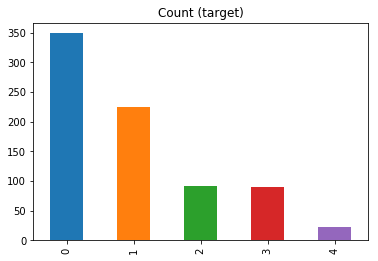

In [8]:
target_count = df.Diagnosis_HD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Class 2:', target_count[2])
print('Class 3:', target_count[3])
print('Class 4:', target_count[4])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

c:\users\aldo azali\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


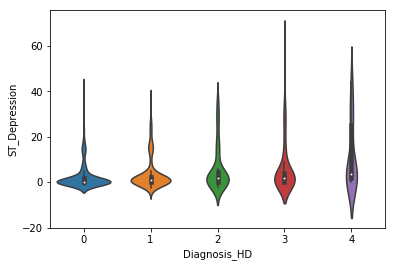

In [9]:
# "Age", Resting_Blood_Pressure , Serum_Cholestrol , "Max-Heart_Rate_Achieved" , ST_Depression
sns.violinplot(x=df['Diagnosis_HD'], y=df['ST_Depression'])

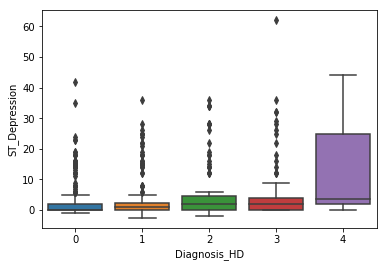

In [10]:
# "Age", Resting_Blood_Pressure , Serum_Cholestrol , "Max-Heart_Rate_Achieved" , ST_Depression
sns.boxplot(x=df['Diagnosis_HD'], y=df['ST_Depression'])

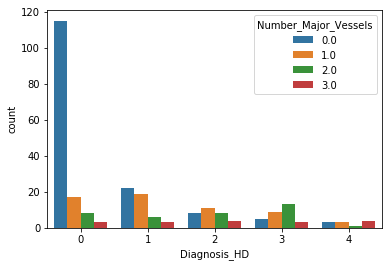

In [11]:
# "Chest-Pain_Type" , -resting_ECG- ,"Peak_Exercise" , "Thal"  , "Number_Major_Vessels", Fasting_Blood_Sugar_120, "Exercise_Induced_Angina"
sns.countplot(x=df['Diagnosis_HD'], hue=df['Number_Major_Vessels'])

### Check Null Values
If there is null values, then change it to :
1. Median
2. dummy value (ex : 'Empty' OR '?')
3. mode

In [12]:
df.isnull().sum()

Age                          0
Sex                          0
Chest-Pain_Type              0
Resting_Blood_Pressure      47
Serum_Cholestrol            24
Fasting_Blood_Sugar_120     78
resting_ECG                  2
Max-Heart_Rate_Achieved     44
Exercise_Induced_Angina     44
ST_Depression               49
Peak_Exercise              262
Number_Major_Vessels       514
Thal                       408
Diagnosis_HD                 0
dtype: int64

In [13]:
# RBP, SC, MHRA, STD,  = median
# FBS, ecg, EIA, pe, NMV, thal = mode
# fbs, ECG , eia, PE,nmv, THAL = 'Empty'
rbp_med = df['Resting_Blood_Pressure'].median()
sc_med = df['Serum_Cholestrol'].median()
mhra_med = df['Max-Heart_Rate_Achieved'].median()
std_med = df['ST_Depression'].median()

In [14]:
# Fill with median
df['Resting_Blood_Pressure'] = df['Resting_Blood_Pressure'].fillna(rbp_med)
df['Serum_Cholestrol'] = df['Serum_Cholestrol'].fillna(sc_med)
df['Max-Heart_Rate_Achieved'] = df['Max-Heart_Rate_Achieved'].fillna(mhra_med)
df['ST_Depression'] = df['ST_Depression'].fillna(std_med)
# Others Fill with '?'
df = df.fillna('?')

In [15]:
rbp_medg = dg['Resting_Blood_Pressure'].median()
sc_medg = dg['Serum_Cholestrol'].median()
mhra_medg = dg['Max-Heart_Rate_Achieved'].median()
std_medg = dg['ST_Depression'].median()

In [16]:
# Fill with median
dg['Resting_Blood_Pressure'] = dg['Resting_Blood_Pressure'].fillna(rbp_medg)
dg['Serum_Cholestrol'] = dg['Serum_Cholestrol'].fillna(sc_medg)
dg['Max-Heart_Rate_Achieved'] = dg['Max-Heart_Rate_Achieved'].fillna(mhra_medg)
dg['ST_Depression'] = dg['ST_Depression'].fillna(std_medg)
# Others Fill with '?'
dg = dg.fillna('?')

In [17]:
dg.isnull().sum()

Age                        0
Sex                        0
Chest-Pain_Type            0
Resting_Blood_Pressure     0
Serum_Cholestrol           0
Fasting_Blood_Sugar_120    0
resting_ECG                0
Max-Heart_Rate_Achieved    0
Exercise_Induced_Angina    0
ST_Depression              0
Peak_Exercise              0
Number_Major_Vessels       0
Thal                       0
dtype: int64

In [18]:
df.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal,Diagnosis_HD
0,54,Male,Asymptotic,125.0,216.0,False,normal,140.0,NO,0.0,?,?,?,1
1,55,Male,Asymptotic,158.0,217.0,False,normal,110.0,YES,2.5,flat,?,?,1
2,54,Female,Non-Anginal_Pain,135.0,304.0,True,normal,170.0,NO,0.0,upsloping,0,normal,0
3,48,Female,Non-Anginal_Pain,120.0,195.0,False,normal,125.0,NO,0.0,?,?,?,0
4,50,Male,Asymptotic,120.0,0.0,False,having_ST-T_wave_abnormality,156.0,YES,0.0,upsloping,?,fixed_defect,3


### Data Train

In [19]:
from scipy.stats import ttest_ind

In [20]:
y_train = df['Diagnosis_HD']  # yang ingin diprediksi
X_train = df.drop(['Diagnosis_HD'], axis = 1)

### Create Data Split Train and Data Split Test(80:20)

In [21]:
from sklearn.model_selection import train_test_split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size = 0.2)
X_train_split.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal
12,61,Male,Typical_Angina,142.0,200.0,True,having_ST-T_wave_abnormality,100.0,NO,1.5,downsloping,?,?
444,38,Male,Atypical_Angina,140.0,297.0,False,normal,150.0,NO,0.0,?,?,?
17,57,Male,Asymptotic,150.0,276.0,False,left_ventricular_hyperthrophy,112.0,YES,6.0,flat,1,fixed_defect
224,57,Male,Atypical_Angina,180.0,285.0,True,having_ST-T_wave_abnormality,120.0,NO,0.8,?,?,?
201,46,Male,Asymptotic,120.0,231.0,False,normal,115.0,YES,0.0,?,?,?


In [22]:
# Class count
count_class_0, count_class_1,count_class_2, count_class_3, count_class_4 = df.Diagnosis_HD.value_counts()

# Divide by class
df_class_0 = df[df['Diagnosis_HD'] == 0]
df_class_1 = df[df['Diagnosis_HD'] == 1]
df_class_2 = df[df['Diagnosis_HD'] == 2]
df_class_3 = df[df['Diagnosis_HD'] == 3]
df_class_4 = df[df['Diagnosis_HD'] == 4]

Random over-sampling:
4    349
3    349
2    349
1    349
0    349
Name: Diagnosis_HD, dtype: int64


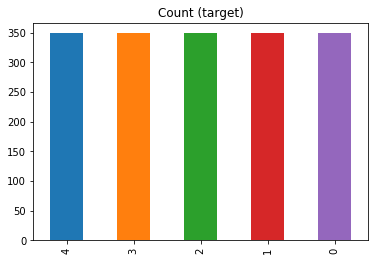

In [23]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_2_over = df_class_2.sample(count_class_0, replace=True)
df_class_3_over = df_class_3.sample(count_class_0, replace=True)
df_class_4_over = df_class_4.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over, df_class_2_over, df_class_3_over, df_class_4_over], axis=0)

print('Random over-sampling:')
print(df_over.Diagnosis_HD.value_counts())

df_over.Diagnosis_HD.value_counts().plot(kind='bar', title='Count (target)');

In [24]:
X_train_split = df_over.drop(['Diagnosis_HD'], axis = 1)
y_train_split = df_over['Diagnosis_HD']

In [25]:
X_train_split = df_over.drop(['Diagnosis_HD'], axis = 1)
y_train_split = df_over['Diagnosis_HD']

## Data Processing

### Feature Engineering

In [26]:
conditions = [
    (X_train_split['Age'] < 30),
    (X_train_split['Age'] >= 30) & (X_train_split['Age'] < 40),
    (X_train_split['Age'] >= 40) & (X_train_split['Age'] < 50),
    (X_train_split['Age'] >= 50) & (X_train_split['Age'] < 60),
    (X_train_split['Age'] >= 60) & (X_train_split['Age'] < 70),
    (X_train_split['Age'] >= 70) ]
choices = ['< 30', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '> 70']
X_train_split['Age_range'] = np.select(conditions, choices, default='50 - 59')
X_train_split.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal,Age_range
2,54,Female,Non-Anginal_Pain,135.0,304.0,True,normal,170.0,NO,0.0,upsloping,0,normal,50 - 59
3,48,Female,Non-Anginal_Pain,120.0,195.0,False,normal,125.0,NO,0.0,?,?,?,40 - 49
5,64,Female,Asymptotic,130.0,303.0,False,normal,122.0,NO,2.0,flat,2,normal,60 - 69
7,58,Male,Atypical_Angina,130.0,251.0,False,normal,110.0,NO,0.0,?,?,?,50 - 59
8,42,Male,Atypical_Angina,150.0,268.0,False,normal,136.0,NO,0.0,?,?,?,40 - 49


In [27]:
condition = [
    (X_test_split['Age'] < 30),
    (X_test_split['Age'] >= 30) & (X_test_split['Age'] < 40),
    (X_test_split['Age'] >= 40) & (X_test_split['Age'] < 50),
    (X_test_split['Age'] >= 50) & (X_test_split['Age'] < 60),
    (X_test_split['Age'] >= 60) & (X_test_split['Age'] < 70),
    (X_test_split['Age'] >= 70)]
choice = ['< 30', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '> 70']
X_test_split['Age_range'] = np.select(condition, choice, default='50 - 59')
X_test_split.head()

c:\users\aldo azali\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal,Age_range
500,63,Male,Typical_Angina,145.0,233.0,True,left_ventricular_hyperthrophy,150.0,NO,23.0,downsloping,0,fixed_defect,60 - 69
52,55,Male,Atypical_Angina,130.0,262.0,False,normal,155.0,NO,0.0,upsloping,0,normal,50 - 59
443,43,Male,Asymptotic,122.0,0.0,False,normal,120.0,NO,0.5,upsloping,?,?,40 - 49
227,47,Male,Non-Anginal_Pain,110.0,0.0,?,normal,120.0,YES,0.0,?,?,normal,40 - 49
441,55,Male,Atypical_Angina,120.0,256.0,True,normal,137.0,NO,0.0,?,?,reversable_defect,50 - 59


In [28]:
conditions = [
    (X_train['Age'] < 30),
    (X_train['Age'] >= 30) & (X_train['Age'] < 40),
    (X_train['Age'] >= 40) & (X_train['Age'] < 50),
    (X_train['Age'] >= 50) & (X_train['Age'] < 60),
    (X_train['Age'] >= 60) & (X_train['Age'] < 70),
    (X_train['Age'] >= 70)]
choices = ['< 30', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '> 70']
X_train['Age_range'] = np.select(conditions, choices, default='50 - 59')
X_train.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal,Age_range
0,54,Male,Asymptotic,125.0,216.0,False,normal,140.0,NO,0.0,?,?,?,50 - 59
1,55,Male,Asymptotic,158.0,217.0,False,normal,110.0,YES,2.5,flat,?,?,50 - 59
2,54,Female,Non-Anginal_Pain,135.0,304.0,True,normal,170.0,NO,0.0,upsloping,0,normal,50 - 59
3,48,Female,Non-Anginal_Pain,120.0,195.0,False,normal,125.0,NO,0.0,?,?,?,40 - 49
4,50,Male,Asymptotic,120.0,0.0,False,having_ST-T_wave_abnormality,156.0,YES,0.0,upsloping,?,fixed_defect,50 - 59


### Make Dummies

In [29]:
X_train_split = pd.get_dummies(X_train_split)
X_test_split = pd.get_dummies(X_test_split)

In [30]:
X_train_split.head()

,Age,Resting_Blood_Pressure,Serum_Cholestrol,Max-Heart_Rate_Achieved,ST_Depression,Sex_Female,Sex_Male,Chest-Pain_Type_Asymptotic,Chest-Pain_Type_Atypical_Angina,Chest-Pain_Type_Non-Anginal_Pain,...,Thal_?,Thal_fixed_defect,Thal_normal,Thal_reversable_defect,Age_range_30 - 39,Age_range_40 - 49,Age_range_50 - 59,Age_range_60 - 69,Age_range_< 30,Age_range_> 70
2,54,135.0,304.0,170.0,0.0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,48,120.0,195.0,125.0,0.0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
5,64,130.0,303.0,122.0,2.0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
7,58,130.0,251.0,110.0,0.0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
8,42,150.0,268.0,136.0,0.0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [31]:
null_in_test = list(set(X_train_split.columns) - set(X_test_split.columns))
null_in_train = list(set(X_test_split.columns) - set(X_train_split.columns))
print(null_in_test)
print(null_in_train)

['resting_ECG_?']
[]


In [32]:
for col in null_in_test:
    X_test_split[col] = 0
    
for col in null_in_train :
    X_train_split[col] = 0

### Modeling with ML

In [33]:
from sklearn.metrics import accuracy_score

#### KNN (K Nearest Neighbors)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
error_rate = []
error_min = 1
min = 0
for i in range(3,40):
    knn_split = KNeighborsClassifier(n_neighbors=i)
    knn_split.fit(X_train_split, y_train_split)
    predict_knn_i_split = knn_split.predict(X_test_split)
    error_rate.append(np.mean(predict_knn_i_split != y_test_split))
    if(np.mean(predict_knn_i_split != y_test_split) < error_min):
        error_min = np.mean(predict_knn_i_split != y_test_split)
        min = i

Text(0, 0.5, 'Error Rate')

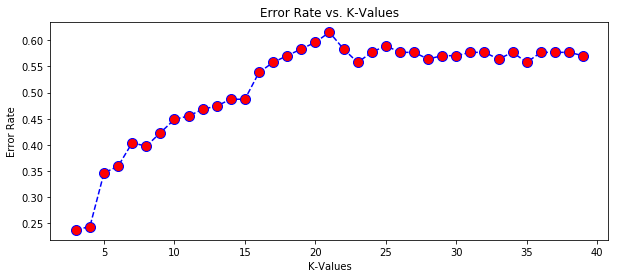

In [83]:
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(3,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

In [84]:
knn = KNeighborsClassifier(n_neighbors=min)
knn.fit(X_train_split, y_train_split)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [85]:
predict_knn = knn.predict(X_test_split)
print('Nilai akurasi knn  : ', accuracy_score(y_test_split, predict_knn))

Nilai akurasi knn  :  0.7628205128205128


In [86]:
predict_knn[0:20]

array([0, 0, 1, 3, 0, 1, 0, 1, 2, 1, 2, 3, 0, 3, 3, 0, 0, 0, 0, 4],
      dtype=int64)

In [87]:
y_test_split.head(20)

500    0
52     0
443    1
227    1
441    0
148    1
649    0
31     0
370    2
456    1
752    2
46     1
732    0
537    3
736    3
702    0
547    0
168    0
135    0
165    4
Name: Diagnosis_HD, dtype: int64

In [88]:
knn.score(X_train_split ,y_train_split)

0.9106017191977077

In [89]:
knn.score(X_test_split, y_test_split)

0.7628205128205128

In [90]:
# Import classification report and confusion matrix to evaluate predictions
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
print(classification_report(y_test_split, predict_knn))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        67
           1       0.81      0.53      0.64        49
           2       0.56      1.00      0.72        18
           3       0.72      0.95      0.82        19
           4       0.75      1.00      0.86         3

   micro avg       0.76      0.76      0.76       156
   macro avg       0.74      0.86      0.77       156
weighted avg       0.79      0.76      0.76       156



In [92]:
# Print out confusion matrix
cmat = confusion_matrix(y_test_split, predict_knn)
print(cmat)
print('TP - True Positive {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TN - True Negative {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

[[54  6  4  3  0]
 [ 9 26  9  4  1]
 [ 0  0 18  0  0]
 [ 0  0  1 18  0]
 [ 0  0  0  0  3]]
TP - True Positive 54
FP - False Positive 6
FN - False Negative 9
TN - True Negative 26
Accuracy Rate: 0.5128205128205128
Misclassification Rate: 0.09615384615384616


## Predict Data Full Test

In [93]:
X_train = pd.get_dummies(X_train)

In [97]:
error_rate = []
error_min = 1
min = 0
for i in range(3,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predict_knn_i = knn.predict(X_test_split)
    error_rate.append(np.mean(predict_knn_i != y_test_split))
    if(np.mean(predict_knn_i_split != y_test_split) < error_min):
        error_min = np.mean(predict_knn_i_split != y_test_split)
        min = i

Text(0, 0.5, 'Error Rate')

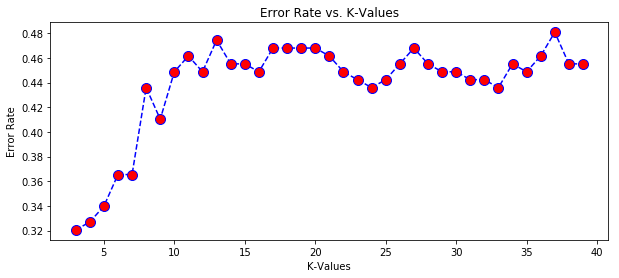

In [98]:
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(3,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

In [99]:
knn = KNeighborsClassifier(n_neighbors=min)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

## Create Model Joblib

In [100]:
from sklearn.externals import joblib
joblib.dump(knn,'KNN_Model.joblib')

['KNN_Model.joblib']

### Referensi

https://medium.com/@kbrook10/day-11-machine-learning-using-knn-k-nearest-neighbors-with-scikit-learn-350c3a1402e6